  
 ## <a style="color:#F8D182" font=" Bookman"  size="75" > Classification des Tweets en Mega_Dataframe  </a> 
   

![Alt Text](https://wp.technologyreview.com/wp-content/uploads/2018/11/darktracetopper-7.gif)

  
 ## <a style="color:#E77D73" font=" Bookman"  size="75" > Read dataset  </a> 
   


In [157]:
import pandas as pd
# from twitter. Pick out the guys with popularity > 10k.
_1 = pd.read_csv('economy_tweets.csv')
_2 = pd.read_csv('education_tweets.csv')
_3 = pd.read_csv('health_tweets.csv')
_4 = pd.read_csv('movies_tweets.csv')
_5 = pd.read_csv('sport_tweets.csv')
                  
mega_df = pd.concat([ _1, _2, _3, _4, _5])
mega_df.shape

(10000, 3)

In [158]:
mega_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10000 non-null  int64 
 1   created_at  10000 non-null  object
 2   text        10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 312.5+ KB


In [159]:
mega_df.head(10)

,id,created_at,text
0,1337883694141485061,2020-12-12 22:15:04,b'Suisse :... #tourism #good #plans #100 #swi...
1,1337883564331896842,2020-12-12 22:14:33,b'We are facing the era of the digital economy...
2,1337883082704248838,2020-12-12 22:12:38,b'Chart Patterns to Watch This Week 12-12-2020...
3,1337882956719910912,2020-12-12 22:12:08,b'Stock-market uncertainty runs high headed in...
4,1337882613856530432,2020-12-12 22:10:46,b'Americans increasingly see the stock market ...
5,1337882488711098373,2020-12-12 22:10:16,b'Year-end Santa rally could depend on the big...
6,1337882233126998016,2020-12-12 22:09:15,b'RT @GoldbeckRecruit: \xf0\x9f\x92\x89A Dose ...
7,1337882068835962881,2020-12-12 22:08:36,"b'Wow, huge disruption (not the Silly Valley k..."
8,1337881949432647680,2020-12-12 22:08:08,b'RT @arabnewspk: #OPINION: #Pakistan must sop...
9,1337881771292192768,2020-12-12 22:07:25,"b'\xf0\x9f\x92\xa1: If we never stop printing,..."


### <a style="color:#AE8884" font=" Bookman"  size="75" > Text Classification </a>

###  <a style="color:#68ACF8" font=" Bookman"  size="75" >Library a installer</a>

In [160]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [161]:
!pip3 install -U spacy

In [162]:
import pandas.util.testing as tm

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tweepy
import csv
import os
import pandas as pd

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

# !pip3 install -U spacy
# !python3 -m spacy download en_core_web_sm

#from sklearn.metrics import jaccard_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADM\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  
 ## <a style="color:#F0A875" font=" Bookman"  size="75" > 1. Cleaning the tweets </a> 
    
 ###  <p style="color:#89B7E9" font=" Bookman"  size="75" >Cleaning the tweets: lemmatization, tokenizing, removing stopwards, punctuations, hashtags and mentions  </p>
   



In [164]:
import re
# remove the hashtags, mentions and unwanted characters from the tweet texts
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

clean_tweets = clean_text(mega_df, 'text')
clean_tweets.head(10000)

,id,created_at,text
0,1337883694141485061,2020-12-12 22:15:04,bsuisse tourism good plans 100 swiss health ...
1,1337883564331896842,2020-12-12 22:14:33,bwe are facing the era of the digital economyx...
2,1337883082704248838,2020-12-12 22:12:38,bchart patterns to watch this week 12122020 n...
3,1337882956719910912,2020-12-12 22:12:08,bstockmarket uncertainty runs high headed into...
4,1337882613856530432,2020-12-12 22:10:46,bamericans increasingly see the stock market a...
...,...,...,...
1995,1337532134492409857,2020-12-11 22:58:05,bnew watches men luxury brand curren chronogra...
1996,1337531716353679360,2020-12-11 22:56:25,batlet anggar cantik asal jerman ini putuskan ...
1997,1337531708602724353,2020-12-11 22:56:24,bxf0x9fx93xb7 les travaux de construction du s...
1998,1337531693658337281,2020-12-11 22:56:20,bles travaux de construction du stade du sxc3x...


 ## <a style="color:#75ADF0" font=" Bookman"  size="75" >  remove stopwords, punctuations, lemmatize and tokenize word </a>

In [165]:
import en_core_web_sm
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import WhitespaceTokenizer
import spacy
import string

nlp = spacy.load("en_core_web_sm")   #working with english only, no support for swahili
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

            
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
mega_df['text'] = mega_df['text'].apply(furnished)

In [166]:
mega_df.sample(5)

,id,created_at,text
550,1337823855893569537,2020-12-12 18:17:17,brt xf0x9fx92x8c sign monthly newsletter liked...
1617,1337810507974275076,2020-12-12 17:24:15,bhow talk southernnlesson 3novehr alt ovahr xe...
1696,1337806856165711872,2020-12-12 17:09:44,brt graduated master degree today nneducation ...
1984,1337645290367545346,2020-12-12 06:27:44,bflicks brick ep 5 harry potter prisoner azkab...
844,1337794130903064576,2020-12-12 16:19:10,brt happy birthday thalaivaxe2x9dxa4nnguess mo...


## <a style="color:#D51E08" font=" Bookman"  size="75" > 2. Defining the set of words. </a>


In [167]:
economy_related_words = '''economic saving sector demand currency inflation finance goods financial gdp trade production consumption
                           thriftiness barter distribution economic system market economyservice good growth recession slowing recovery
                           market downturn slowdown unemployment crisis economist markets global consumer prices outlook weakening
                           exports country nation competitiveness sentiment agriculture infrastructure capitalism trading service sector technology  economical supply 
                          industrialism efficiency frugality retrenchment downsizing   credit debit value 
                         economize   save  economically
                         economies sluggish rise   rising spending conserve trend 
                         low-management  decline   industry impact poor  
                            profession    surplus   fall
                         declining  accelerating interest sectors balance stability productivity increase rates
                            pushing expanding stabilize  rate industrial borrowing struggling
                           deficit predicted    increasing  data
                          economizer analysts investment market-based economy   debt free enterprise
                         medium  exchange metric savepoint scarcity capital bank company stockholder fund business  
                         asset treasury tourism incomes contraction employment jobs upturn deflation  macroeconomics
                         bankruptcies exporters hyperinflation dollar entrepreneurship upswing marketplace commerce devaluation 
                         quicksave deindustrialization stockmarket reflation downspin dollarization withholder bankroll venture capital
                         mutual fund plan economy mortgage lender unemployment rate credit crunch central bank financial institution
                         bank rate custom duties mass-production black-market developing-countries developing economic-growth gdp trade barter 
                         distribution downturn economist'''

In [168]:
education_related_words= '''instruction  schooling  teaching  training  tuition  tutelage  tutoring  didactics  pedagogics  pedagogy higher education higher learning  coaching  conditioning  cultivation  preparation  
                            readying  development  direction  guidance  nurturance  nurturing edification enlightenment improvement'''

In [169]:
health_related_words = ''' covid corona covid19 SAS disease obesity world health organization medicine nutrition well-being exercise welfare wellness health care public health 
                     nursing stress safety hygiene research social healthy condition aids epidemiology healthiness wellbeing
                     care illness medical dieteducation infectious disease environmental healthcare physical fitness hospitals 
                     health care provider doctors healthy community design insurance sanitation human body patient mental health
                      medicare agriculture health science fitnesshealth policy  weight loss physical therapy psychology pharmacy
                     metabolic organism human lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family
                     eudaimonia eudaemonia air house prevention genetics public families poor needs treatment communicable disease 
                     study protection malaria development food priority management healthful mental provide department administration
                     programs help assistance funding environment improving emergency need program affected schools private mental illness 
                     treat diseases preparedness perinatal fertility sickness veterinary sanitary pharmacists behavioral midwives
                     gerontology infertility hospitalization midwifery cholesterol childcare pediatrician pediatrics medicaid asthma 
                     pensions sicknesses push-up physical education body-mass-index eat well gymnastic apparatus tune up good morning 
                     bathing low blood-pressure heart attack health club ride-bike you feel good eczema urticaria dermatitis sunburn overwork 
                     manufacturing medical sociology need exercise run'''

In [170]:
movies_related_words = ''' movie cinema celluloid picture movie projector shoot photographic film television motion picture filmmaking
                           soundtrack documentary dvd animation flick movie theater photography screenplay microfilm reshoot film director 
                           episode actor take pic scene moving picture picture show telefilm art cinematography sequel filmmaker
                           film noir videotape silver screen movie screen video studio thriller computer animation'''

In [171]:
sport_related_words = '''athletics spectator sportcompetition game racing gymnastics sportsman soccer rugby union association football
                         downfield offside cycling tennis polo team hockey football skating professional sport athletic run call
                         referee kill spar judo ineligible wipeout schuss luge athletic game team sport archery upfield contact sport
                         professional football funambulism toboggan professional baseball professional basketball personal foul'''

## <a style="color:#D51E08" font=" Bookman"  size="75" > 3. Preprocessing the sets.

## <a style="color:#C37D58" font=" Bookman"  size="75" >Tokenizing and removing stop words from the sets. </a>

In [172]:
import en_core_web_sm
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

In [173]:

economy = furnished(economy_related_words)
education = furnished(education_related_words)
health = furnished(health_related_words)
movies = furnished(movies_related_words)
sport = furnished(sport_related_words)


In [174]:
mega_df.head()

,id,created_at,text
0,1337883694141485061,2020-12-12 22:15:04,bsuisse tourism good plan 100 swiss health wel...
1,1337883564331896842,2020-12-12 22:14:33,bwe facing era digital economyxf0x9fx92xb0nwha...
2,1337883082704248838,2020-12-12 22:12:38,bchart pattern watch week 12122020 nio ayro cg...
3,1337882956719910912,2020-12-12 22:12:08,bstockmarket uncertainty run high headed fedxe...
4,1337882613856530432,2020-12-12 22:10:46,bamericans increasingly see stock market barom...


***
### <a style="color:#C37D58" font=" Bookman"  size="75" >Removing duplicates</a>

In [175]:
# delete duplicates
st1 = economy
words = st1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy

'economic saving sector demand currency inflation finance good financial gdp trade production consumption thriftiness barter distribution system market economyservice growth recession slowing recovery downturn slowdown unemployment crisis economist global consumer price outlook weakening export country nation competitiveness sentiment agriculture infrastructure capitalism trading service technology economical supply industrialism efficiency frugality retrenchment downsizing credit debit value economize save economically economy sluggish rise rising spending conserve trend low-management decline industry impact poor profession surplus fall declining accelerating interest balance stability productivity increase rate pushing expanding stabilize industrial borrowing struggling deficit predicted increasing data economizer analyst investment market-based debt free enterprise medium exchange metric savepoint scarcity capital bank company stockholder fund business asset treasury tourism income

In [176]:
st1 = education
words = st1.split()
education = " ".join(sorted(set(words), key=words.index))
education

'instruction schooling teaching training tuition tutelage tutoring didactics pedagogics pedagogy higher education learning coaching conditioning cultivation preparation readying development direction guidance nurturance nurturing edification enlightenment improvement'

In [177]:
st1 = health
words = st1.split()
health = " ".join(sorted(set(words), key=words.index))
health

'covid corona covid19 sas disease obesity world health organization medicine nutrition well-being exercise welfare wellness care public nursing stress safety hygiene research social healthy condition aid epidemiology healthiness wellbeing illness medical dieteducation infectious environmental healthcare physical fitness hospital provider doctor community design insurance sanitation human body patient mental medicare agriculture science fitnesshealth policy weight loss therapy psychology pharmacy metabolic organism lifestyle status unhealthy upbeat vaccination sleep condom alcohol smoking water family eudaimonia eudaemonia air house prevention genetics poor need treatment communicable study protection malaria development food priority management healthful provide department administration program help assistance funding environment improving emergency affected school private treat preparedness perinatal fertility sickness veterinary sanitary pharmacist behavioral midwife gerontology inf

In [178]:
st1 = movies
words = st1.split()
movies = " ".join(sorted(set(words), key=words.index))
movies

'movie cinema celluloid picture projector shoot photographic film television motion filmmaking soundtrack documentary dvd animation flick theater photography screenplay microfilm reshoot director episode actor take pic scene moving show telefilm art cinematography sequel filmmaker noir videotape silver screen video studio thriller computer'

In [179]:
st1 = sport
words = st1.split()
sport = " ".join(sorted(set(words), key=words.index))
sport

'athletics spectator sportcompetition game racing gymnastics sportsman soccer rugby union association football downfield offside cycling tennis polo team hockey skating professional sport athletic run call referee kill spar judo ineligible wipeout schuss luge archery upfield contact funambulism toboggan baseball basketball personal foul'

## <a style="color:#D51E08" font=" Bookman"  size="75" > 4. Vectorizing and Standadization </a>

****

*** Vectorizing the sets of words, then standardizing them. TFIDF will be used in order to take care of the least 
frequent words. Standardizing is cause TFIDF favors long sentences and there'll be inconsistencies between the length 
of the tweets and the length of set of words.  ***

In [180]:
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [181]:
economyvector = get_vectors(economy)
education_vector = get_vectors(education)
health_vector = get_vectors(health)
movies_vector = get_vectors(movies)
sport_vector = get_vectors(sport)

## <a style="color:#C37D58" font=" Bookman"  size="75" >  Vectorizing the tweets</a>

In [182]:
mega_df.head()

,id,created_at,text
0,1337883694141485061,2020-12-12 22:15:04,bsuisse tourism good plan 100 swiss health wel...
1,1337883564331896842,2020-12-12 22:14:33,bwe facing era digital economyxf0x9fx92xb0nwha...
2,1337883082704248838,2020-12-12 22:12:38,bchart pattern watch week 12122020 nio ayro cg...
3,1337882956719910912,2020-12-12 22:12:08,bstockmarket uncertainty run high headed fedxe...
4,1337882613856530432,2020-12-12 22:10:46,bamericans increasingly see stock market barom...


In [183]:

## Vectorizing the tweets
tv=TfidfVectorizer()
# tweets_bowl = tweets_bowl.tweets.apply(get_vectors)
# tweets_bowl.head()
tfidf_tweets =tv.fit_transform(mega_df.text)

In [184]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
# jaccard_score(socialvector, economic_vector)

#for similarity of 1 and 2 of column1
# jaccard_similarity('dog lion a dog','dog is cat')


def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [185]:
# economic scores
e_scores = get_scores(economy, mega_df.text.to_list())
e_scores[-10:]

[0.7857142857142857,
 0.7058823529411765,
 0.6875,
 0.75,
 0.625,
 0.71875,
 0.6875,
 0.6285714285714286,
 0.6764705882352942,
 0.625]

In [186]:
h_scores = get_scores(health, mega_df.text.to_list())
h_scores[-10:]

[0.7241379310344828,
 0.7058823529411765,
 0.6875,
 0.696969696969697,
 0.625,
 0.6666666666666666,
 0.6363636363636364,
 0.6764705882352942,
 0.7272727272727273,
 0.625]

In [187]:
ed_scores = get_scores(education, mega_df.text.to_list())
ed_scores[-10:]

[0.75,
 0.5625,
 0.6428571428571429,
 0.6551724137931034,
 0.6923076923076923,
 0.6206896551724138,
 0.6428571428571429,
 0.6333333333333333,
 0.6896551724137931,
 0.6923076923076923]

In [188]:
m_scores = get_scores(movies, mega_df.text.to_list())
m_scores[-10:]

[0.7692307692307693,
 0.6363636363636364,
 0.6666666666666666,
 0.6774193548387096,
 0.6,
 0.6451612903225806,
 0.6666666666666666,
 0.6060606060606061,
 0.65625,
 0.6]

In [189]:
s_scores = get_scores(sport, mega_df.text.to_list())
s_scores[-10:]

[0.8,
 0.7096774193548387,
 0.6896551724137931,
 0.7,
 0.6206896551724138,
 0.6666666666666666,
 0.75,
 0.625,
 0.6774193548387096,
 0.6206896551724138]

In [190]:
'''new df with names, and the jaccard scores for each group'''

data  = {'id':mega_df.id.to_list(), 'economy_score':e_scores, 'education_score':ed_scores,
         'sport_score': s_scores, 'movies_score':m_scores, 'health_scores':h_scores}
scores_df = pd.DataFrame(data)
scores_df.head(200)

,id,economy_score,education_score,sport_score,movies_score,health_scores
0,1337883694141485061,0.636364,0.642857,0.689655,0.612903,0.687500
1,1337883564331896842,0.636364,0.642857,0.689655,0.612903,0.687500
2,1337883082704248838,0.606061,0.500000,0.600000,0.580645,0.606061
3,1337882956719910912,0.727273,0.633333,0.733333,0.709677,0.676471
4,1337882613856530432,0.593750,0.535714,0.642857,0.566667,0.593750
...,...,...,...,...,...,...
195,1337837778982330368,0.656250,0.666667,0.655172,0.633333,0.656250
196,1337837566293250050,0.647059,0.655172,0.593750,0.575758,0.750000
197,1337837475587297282,0.535714,0.666667,0.583333,0.560000,0.535714
198,1337836639826169858,0.718750,0.678571,0.724138,0.700000,0.666667


In [191]:
'''Actual assigning of classes to the tweets'''

def get_clusters(l1, l2, l3, l4,l5):
    
    econ = []
    sport = []
    edu = []
    heal = []
    mov = []
    for i, j, k, l, n in zip(l1, l2, l3, l4, l5):
        m = max(i, j, k, l, n)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            sport.append(1)
        else:
            sport.append(0)        
        if m == k:
            edu.append(1)
        else:
            edu.append(0)  
        if m == l:
            heal.append(1)
        
        else:
            heal.append(0)   
            
        if m == n:
            mov.append(1)
        else:
            mov.append(0) 
    return econ, sport, edu, heal, mov

In [192]:
l1 = scores_df.economy_score.to_list()
l2 = scores_df.sport_score.to_list()
l3 = scores_df.education_score.to_list()
l4 = scores_df.health_scores.to_list()
l5 = scores_df.movies_score.to_list()

econ, sport, edu, heal, mov = get_clusters(l1, l2, l3, l4, l5)

In [193]:
data = {'name': scores_df.id.to_list(), 'economic':econ, 'sport':sport, 'education':edu, 'health': heal, 'movies': mov}
cluster_df = pd.DataFrame(data)
cluster_df.head(5)

,name,economic,sport,education,health,movies
0,1337883694141485061,0,1,0,0,0
1,1337883564331896842,0,1,0,0,0
2,1337883082704248838,1,0,0,1,0
3,1337882956719910912,0,1,0,0,0
4,1337882613856530432,0,1,0,0,0


In [194]:
'''Due to the close similarity between the economic, social and health tweets, some tweets have multiple categories, 
so to take care of that the rows with a sum > 1 will have to share the categories. After this, clustering will take care 
of the fractions'''


a =  cluster_df[['economic', 'sport', 'education', 'health', 'movies']].sum(axis = 1) > 1
c = cluster_df[['economic', 'sport', 'education', 'health', 'movies']].sum(axis = 1)
# b = cluster_df.copy()
cluster_df.loc[(a), ['economic', 'sport', 'education', 'health', 'movies']] = 1/c

In [195]:

cluster_df.shape

(10000, 6)

## <a style="color:#E9EB5E" font=" Bookman"  size="75" > Clustered DF </a>

In [196]:
pivot_clusters = cluster_df.groupby(['name']).sum()
pivot_clusters['economic'] = pivot_clusters['economic'].astype(int)
pivot_clusters['sport'] = pivot_clusters['sport'].astype(int)
pivot_clusters['education'] = pivot_clusters['education'].astype(int)
pivot_clusters['health'] = pivot_clusters['health'].astype(int)
pivot_clusters['movies'] = pivot_clusters['movies'].astype(int)
pivot_clusters['total'] = pivot_clusters['health'] + pivot_clusters['education'] + pivot_clusters['sport'] +  pivot_clusters['economic']+pivot_clusters['movies'] 
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()

(9929, 6)


,economic,sport,education,health,movies,total
name,,,,,,
1337889570403328001,1,0,0,0,0,1
1337889574865911809,1,0,0,0,0,1
1337889659897212939,1,0,0,0,0,1
1337889805330345984,0,1,0,0,0,1
Total,469,3108,2556,2865,32,9030



## <a style="color:#E9EB5E" font=" Bookman"  size="75" > Visualisations </a>

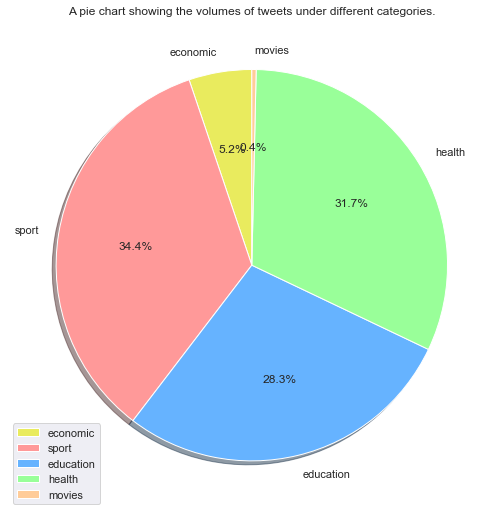

In [197]:

fig = plt.figure(figsize =(19, 9)) 
#add colors
colors = ['#E9EB5E','#ff9999','#66b3ff','#99ff99','#ffcc99']

a = pivot_clusters.drop(['total'], axis = 1)

plt.pie(a.loc['Total'], labels = a.columns , colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('A pie chart showing the volumes of tweets under different categories.' )
plt.legend()
plt.show()

*** The 31.7% percentage in health could be as a result of the current pandemic, Covid19, everyone is talking about it thus a huge volume of tweets. (The tweets are the most recent 500).



*** The sport tweets (34.4%) follow, this could be related with sports after covid.

****
### => So this is mainnly a bias in the classification method.

C:\Users\ADM\.conda\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


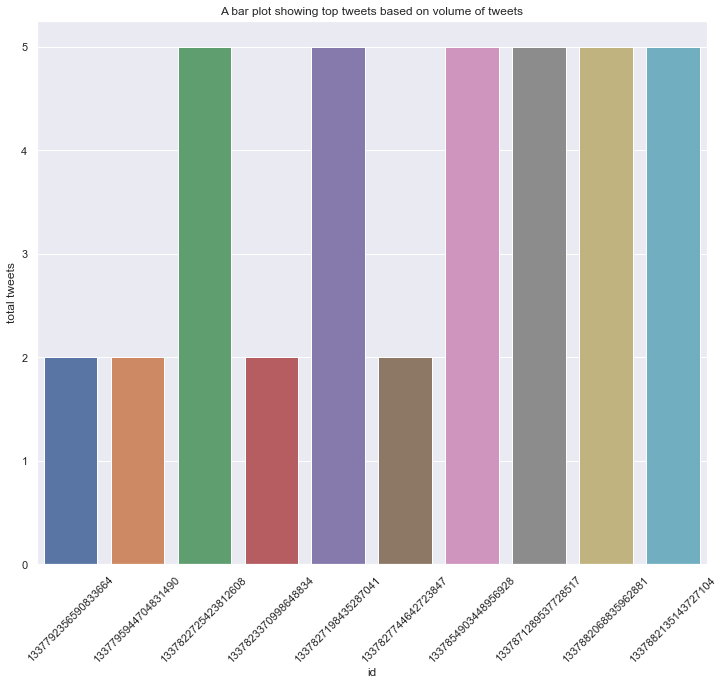

In [198]:

''' Users with most tweets'''

d = pivot_clusters.sort_values(by = 'total', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.total)
plt.title('A bar plot showing top tweets based on volume of tweets')
plt.xticks(rotation=45)
plt.xlabel('id')
plt.ylabel('total tweets')

plt.show()

### '' Exemple 1: Users with most economy tweets'''

Text(0, 0.5, 'economy tweets')

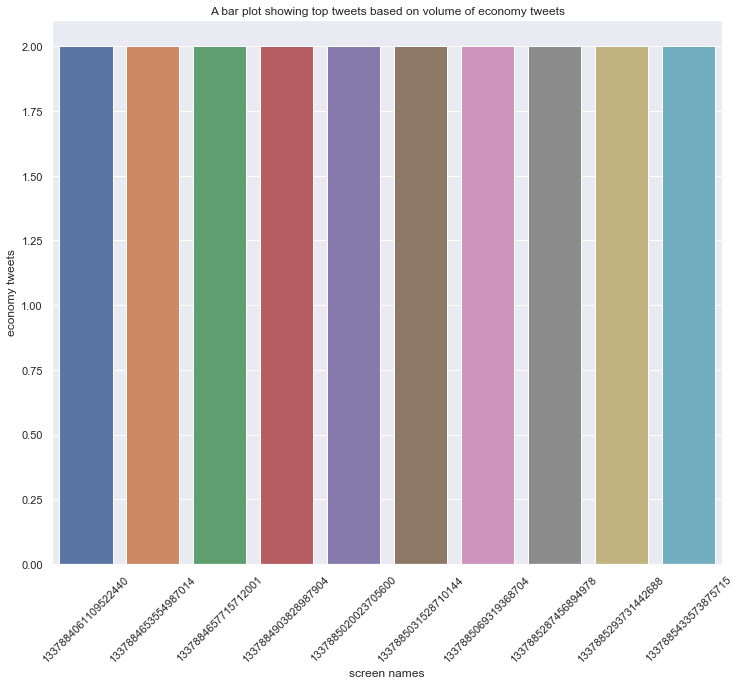

In [199]:
d = pivot_clusters.sort_values(by = 'economic', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.economic)
plt.title('A bar plot showing top tweets based on volume of economy tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('economy tweets')

Text(336.9714285714286, 0.5, 'economy tweets')

<Figure size 864x720 with 0 Axes>

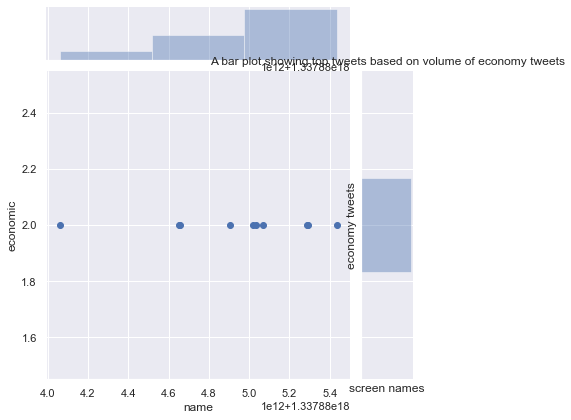

In [200]:
d = pivot_clusters.sort_values(by = 'economic', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.jointplot(x = e.index, y = e.economic)
plt.title('A bar plot showing top tweets based on volume of economy tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('economy tweets')

### '' Exemple 2 : Users with most sport tweets'''

Text(0, 0.5, 'sport tweets')

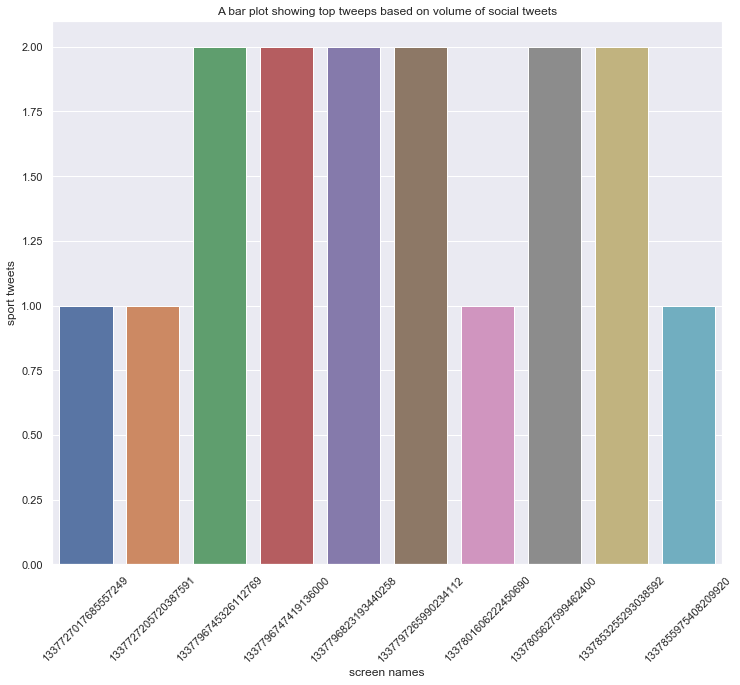

In [201]:
d = pivot_clusters.sort_values(by = 'sport', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.sport)
plt.title('A bar plot showing top tweeps based on volume of social tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('sport tweets')

Text(336.9714285714286, 0.5, 'sport tweets')

<Figure size 864x720 with 0 Axes>

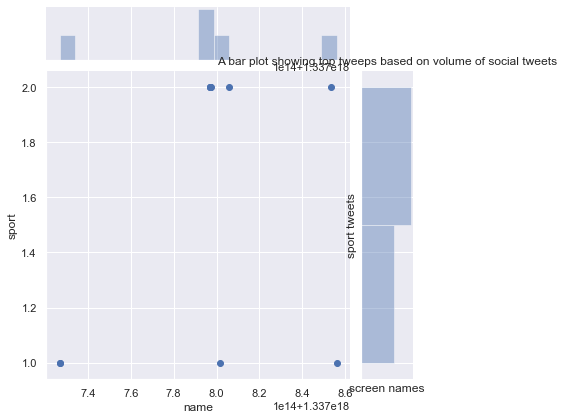

In [202]:

d = pivot_clusters.sort_values(by = 'sport', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)


plt.figure(figsize=(12,10))
sns.jointplot(x = e.index, y = e.sport)
plt.title('A bar plot showing top tweeps based on volume of social tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('sport tweets')

### Exemple 3: Users with most education tweets

Text(0, 0.5, 'education tweets')

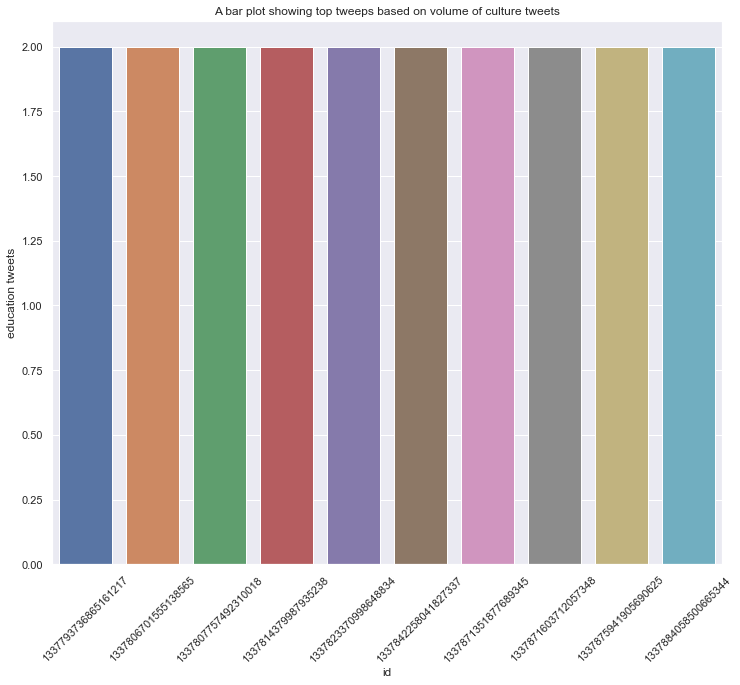

In [203]:

d = pivot_clusters.sort_values(by = 'education', ascending  = False)
e = d.head(11)
e.drop(e.head(1).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.education)
plt.title('A bar plot showing top tweeps based on volume of culture tweets')
plt.xticks(rotation=45)
plt.xlabel('id')
plt.ylabel('education tweets')

### Exemple 4: Users with most health tweets

Text(0, 0.5, 'health tweets')

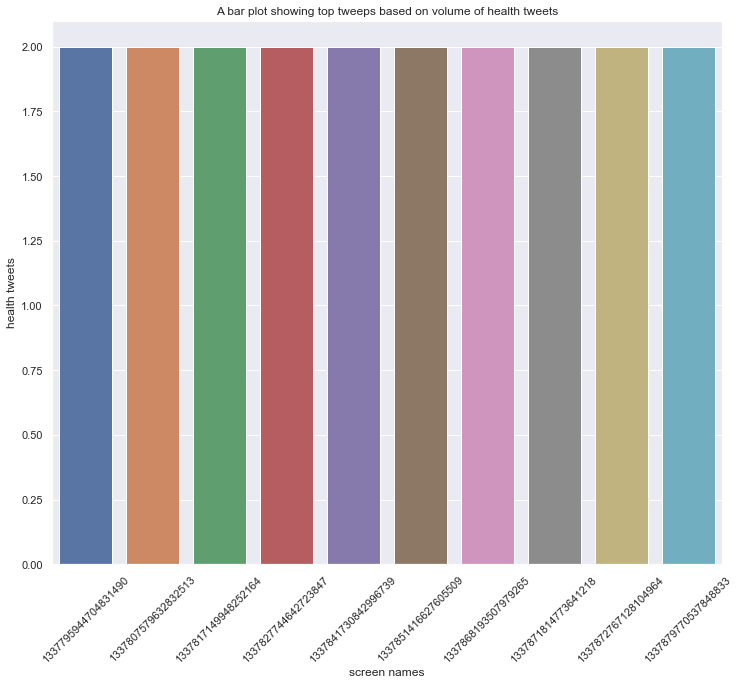

In [204]:



d = pivot_clusters.sort_values(by = 'health', ascending  = False)
e = d.head(12)
e.drop(e.head(2).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.health)
plt.title('A bar plot showing top tweeps based on volume of health tweets')
plt.xticks(rotation=45)
plt.xlabel('screen names')
plt.ylabel('health tweets')

## Distribution test and skewness

In [210]:
from statistics import mean
import re
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler

In [211]:

# drop the totals row.
print(pivot_clusters.shape)
pivot_clusters.drop(pivot_clusters.tail(1).index,inplace=True)
print(pivot_clusters.shape)

(9929, 6)
(9928, 6)



 mu = 0.05 and sigma = 0.22



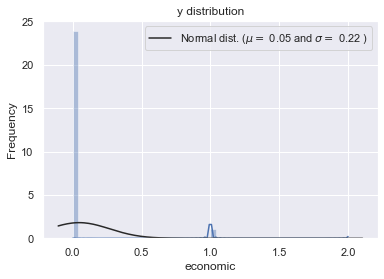

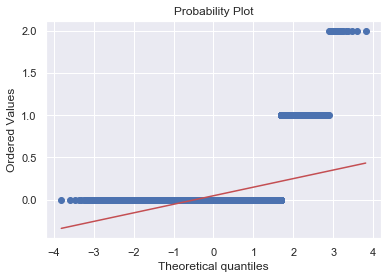

In [212]:
# Target variable
sns.distplot(pivot_clusters.economic , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.economic)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.title('Ecocnomy tweets distribution plot')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.economic, plot=plt)
plt.show()


 mu = 0.31 and sigma = 0.47



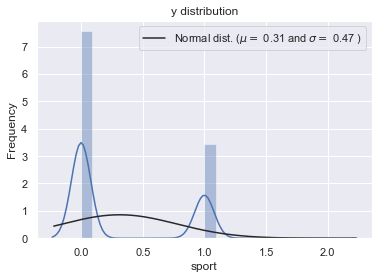

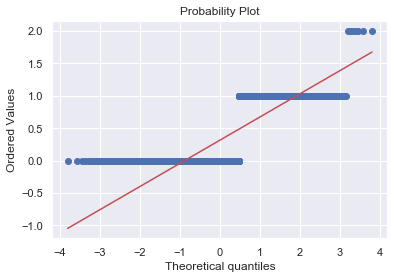

In [215]:
# Target variable
sns.distplot(pivot_clusters.sport , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.sport)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Sport tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.sport, plot=plt)
plt.show()


 mu = 0.26 and sigma = 0.44



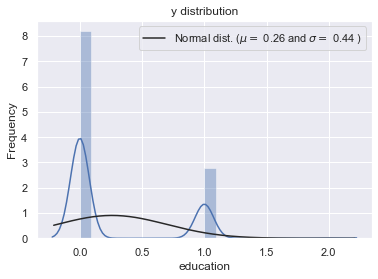

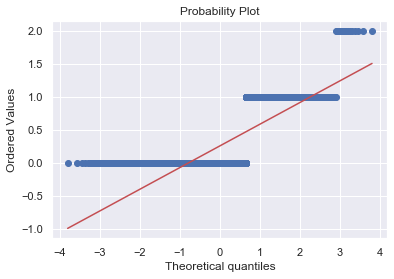

In [216]:
# Target variable
sns.distplot(pivot_clusters.education , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.education)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Culture tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.education, plot=plt)
plt.show()


 mu = 0.29 and sigma = 0.46



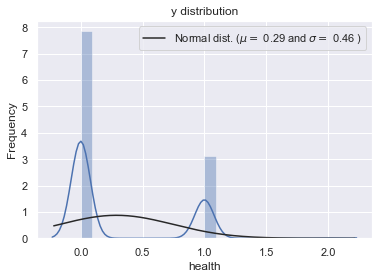

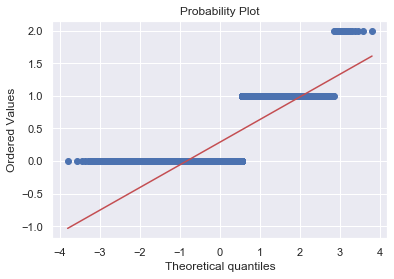

In [217]:
# Target variable
sns.distplot(pivot_clusters.health , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(pivot_clusters.health)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.title('Health tweets distribution plot')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(pivot_clusters.health, plot=plt)
plt.show()

## KMeans Clustering:
Distance computation in k-Means weights each dimension equally and hence care must be taken to ensure that unit of dimension shouldn’t distort relative near-ness of observations. Common method is to unit-standardize each dimension individually.' The unit for the tweets are the same, thus no need.

In [205]:

from sklearn.cluster import KMeans

## 2D Clusters.

C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


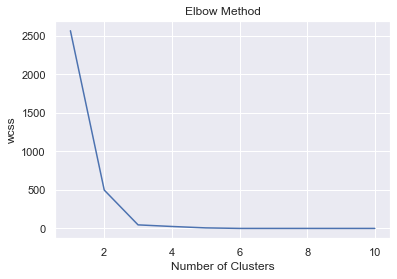

In [218]:
# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['economic', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

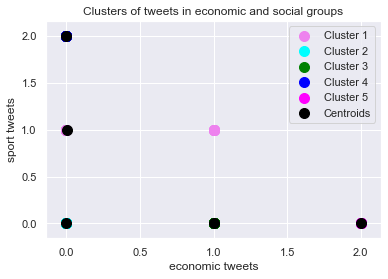

In [221]:

# fitting kmeans to dataset
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and social groups')
plt.xlabel('economic tweets')
plt.ylabel('sport tweets')
plt.legend()
plt.show()

C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


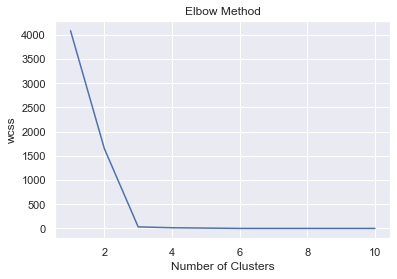

In [222]:
# X = pivot_clusters.iloc[:, [2,3]].values
X = pivot_clusters[['sport', 'education']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

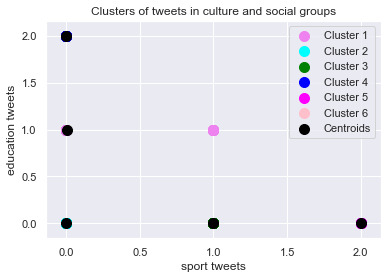

In [223]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in culture and social groups')
plt.xlabel('sport tweets')
plt.ylabel('education tweets')
plt.legend()
plt.show()

C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


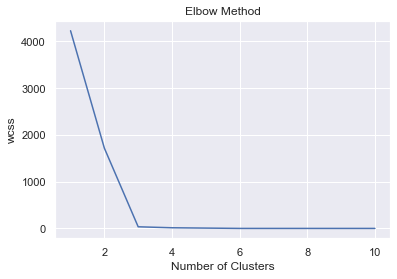

In [224]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['sport', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

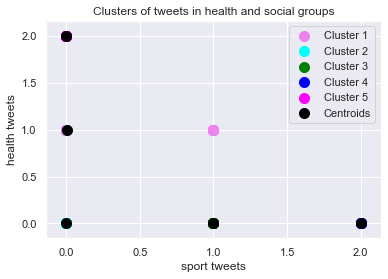

In [227]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in health and social groups')
plt.xlabel('sport tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()

C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


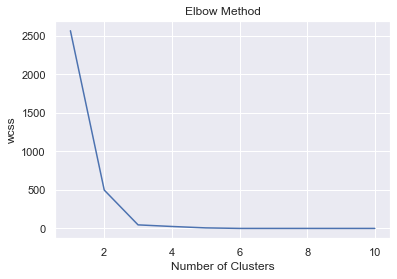

In [228]:
X = pivot_clusters[['economic', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

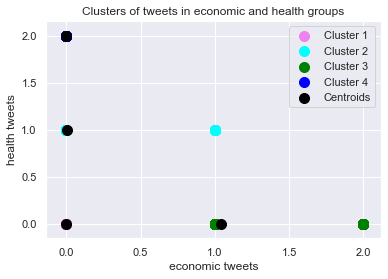

In [231]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and health groups')
plt.xlabel('economic tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()

C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


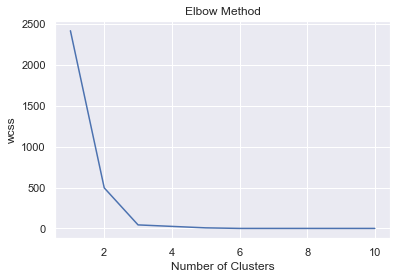

In [232]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['economic', 'education']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

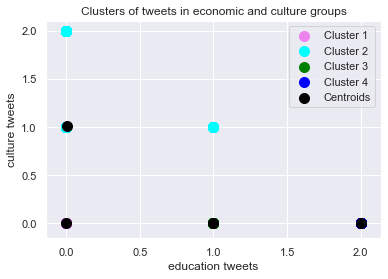

In [233]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and culture groups')
plt.xlabel('education tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


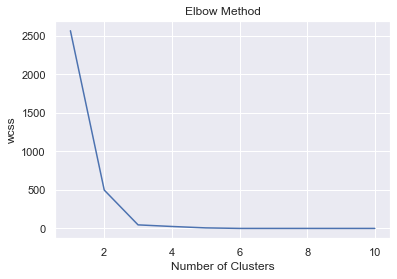

In [235]:

# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['economic', 'health']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

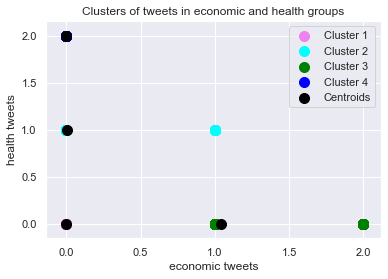

In [236]:

# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in economic and health groups')
plt.xlabel('economic tweets')
plt.ylabel('health tweets')
plt.legend()
plt.show()

C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ADM\.conda\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


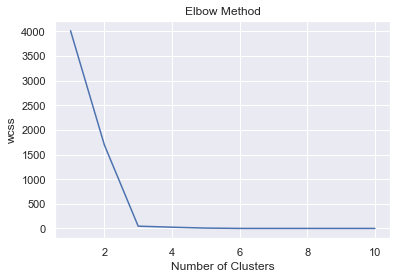

In [238]:

# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['health', 'education']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

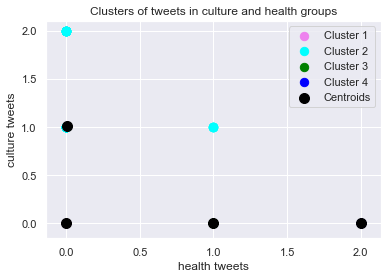

In [239]:

# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=70, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=70, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in culture and health groups')
plt.xlabel('health tweets')
plt.ylabel('culture tweets')
plt.legend()
plt.show()

## <a style="color:#E2512A" font=" Bookman"  size="75" > =>Les clusters ne sont pas visibles ils ont confondues avec centroides ceux-ci revient a la phase de collects des tweets </a>